# 1. Import Libraries

In [8]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
import tensorflow
tensorflow.__version__

'2.15.1'

# 2. Load Model

In [3]:
# Load model yang telah disimpan
model = load_model('model_sequential.hdf5')

# 3. Inference

In [13]:
def prediction(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Gambar tidak ditemukan: {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (220, 220))
    img_normalized = img_resized.astype('float32') / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)

    pred = model.predict(img_batch, verbose=0)
    label = 'DR' if pred[0][0] >= 0.5 else 'No_DR'

    print(f"Hasil Prediksi: {label}")
    plt.imshow(img)
    plt.title(f"Prediksi: {label}")
    plt.axis('off')
    plt.show()


Hasil Prediksi: DR


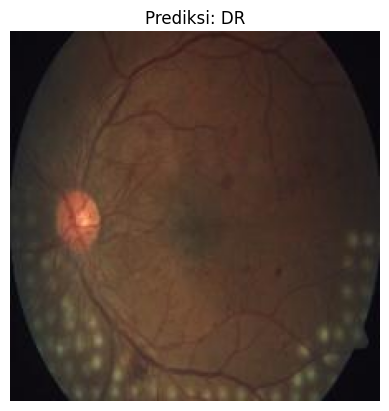

In [28]:
prediction('image1.jpg')